In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [3]:
X_train = X_train/255.0
X_test = X_test/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape[1:])

(28, 28)


In [4]:
model = Sequential()
model.add(LSTM(256,input_shape = X_train.shape[1:], activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation = 'relu'))
model.add(Dropout(0.2))

#model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [5]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
history = model.fit(X_train, y_train, epochs = 2, batch_size = 32)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.4449 - accuracy: 0.8592
Epoch 2/2
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.1111 - accuracy: 0.9679


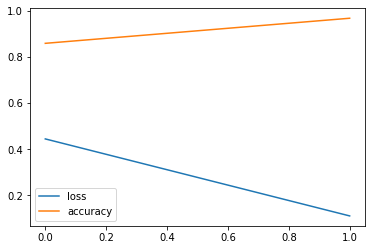

In [10]:
pd.DataFrame(history.history).plot()